In [10]:
import numpy as np
import pandas as pd

# Jupyter Notebookの出力桁数を指定する
%precision 3
# Dataframeの出力を小数点以下3桁にする
pd.set_option('precision', 3)

In [11]:
df = pd.read_csv('/Users/yuya/Desktop/Python_Static/python_stat_sample/data/ch2_scores_em.csv', index_col='生徒番号')

In [12]:
# 読み込んだdfの最初の5行を読み込む
# ()を付けないと全部表示される
df.head()

,英語,数学
生徒番号,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [13]:
scores = np.array(df['英語'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [14]:
scores_df = pd.DataFrame({'点数':scores}, index=pd.Index(['A', 'B', 'C', 'D',' E', 'F',
                                                                                         'G', 'H', 'I', 'J'], name='生徒'))
scores_df

,点数
生徒,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [15]:
# 平均値(Pythonの関数)
sum(scores)/len(scores)

55.0

In [16]:
# 平均値(NumPy-Array)
np.mean(scores)

55.0

In [17]:
# 平均値(Pandas-DataFrame)
scores_df.mean()

点数    55.0
dtype: float64

In [18]:
# 中央値を求めるためにソート
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [19]:
# ソートした配列に対して中央値を求める(Python)

# 要素数
n = len(sorted_scores)


if n % 2 == 0:
    # 要素数が偶数の場合はn/2 -1, n/2番目の要素の平均値
    tgtNum1 = sorted_scores[n//2 - 1]
    tgtNum2 = sorted_scores[n//2]
    median = (tgtNum1 + tgtNum2) / 2
else:
    # 要素数が奇数の場合はn/2番目の要素が中央値
    median = sorted_scores[n/2]
    
median

56.5

In [20]:
# 配列に対して中央値を求める(NumPy)
np.median(scores)

56.5

In [21]:
# 最頻値
pd.Series([1, 1, 1, 2, 3]).mode()

0    1
dtype: int64

In [22]:
# 最頻値
pd.Series([1, 2, 3, 4, 5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [23]:
# 偏差
# →(平均) - (それぞれの値)
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [24]:
# 偏差(別グループ)
another_scores = [50, 60, 58, 54, 51, 56, 57, 53, 52, 59]
another_mean = np.mean(another_scores)
another_diviation = another_scores - another_mean
another_diviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [25]:
# 偏差平均
np.mean(deviation)

0.0

In [26]:
# 偏差平均(別グループ)
# 偏差の平均は常に0になる
np.mean(another_diviation)

0.0

In [27]:
# これまでのまとめ(DataFrameを使って)
summary_df = scores_df.copy()
summary_df['偏差'] = deviation
summary_df

,点数,偏差
生徒,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [28]:
# 点数、偏差の平均
summary_df.mean()

点数    55.0
偏差     0.0
dtype: float64

In [29]:
# 分散(NumPy1)
# →偏差の2乗の平均
np.mean(deviation ** 2)

86.0

In [30]:
# 分散(NumPy2)
# NumPyのデフォルトは標本分散
np.var(scores)

86.0

In [31]:
# 分散(DataFrame)
# Pandasのデフォルトは不偏分散
# 引数に「ddof = 1」を指定すると標本分散を求める
scores_df.var()

点数    95.556
dtype: float64

In [32]:
# summary_dfに偏差2乗の列を追加
summary_df['偏差二乗'] = np.square(deviation)
summary_df

,点数,偏差,偏差二乗
生徒,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [33]:
summary_df.mean()

点数      55.0
偏差       0.0
偏差二乗    86.0
dtype: float64

In [34]:
# 標準偏差(Python)
# →分散のルート
np.sqrt(np.var(scores, ddof=0))

9.273618495495704

In [35]:
# 標準偏差(Numpy)
np.std(scores, ddof=0)

9.273618495495704

In [36]:
# 範囲(Python)
np.max(scores) - np.min(scores)

28

In [37]:
# 四分位範囲(interquartile range)
# →データの下位25%、50%、75%に位置する値をそれぞれ
#    Q1、Q2、Q3とした時に、
#    IQR = Q3 - Q1
#   で求められる値
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IOR = scores_Q3 - scores_Q1
scores_IOR

15.0

In [38]:
# データ指標のまとめ(DataFrame、Series)
pd.Series(scores).describe()

count    10.000
mean     55.000
std       9.775
min      41.000
25%      48.250
50%      56.500
75%      63.250
max      69.000
dtype: float64

In [39]:
# 標準化
# →データから平均を引き、標準偏差で割る操作
#    標準化されたデータを基準化変化量、Zスコアと呼ぶ
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [40]:
# 標準化されたデータでは平均が0、標準偏差が1になる
np.mean(z), np.std(z)

(-1.6653345369377347e-17, 0.9999999999999999)

In [41]:
# 偏差値
# →平均が50、標準偏差が10になるように正規化した値
z = 50 + 10 * (scores-np.mean(scores)) / np.std(scores)
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [42]:
# DataFrameに偏差値をまとめる
scores_df['偏差値'] = z
scores_df

,点数,偏差値
生徒,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783


In [43]:
# 50人全員の英語の点数を分析する
english_scores = np.array(df['英語'])
pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

In [44]:
# 度数分布表を作成する(NumPy)
#→データがとる値をいくつかの区間に分けて、
#   各区間にいくつのデータが存在するかを数える

#bins:階級数、range:最小値、最大値
freq, _  = np.histogram(english_scores, bins=10, range=(0, 100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [45]:
# DataFrameに結果をまとめる
# 0〜10、10〜20、.....の文字列のリストを作成
freq_class = [f'{i}~{i+10}' for i in range(0, 100 , 10)]
# freq_classをインデックスとしてfreqでDataFrameを作成
freq_dist_df = pd.DataFrame({'度数':freq}, index=pd.Index(freq_class, name='階級'))

freq_dist_df

,度数
階級,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [46]:
# 階級値
# →各階級を代表する値、階級の中央の値が使われる
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [47]:
# 相対度数
# →全データ数に対して、その階級のデータがどれくらいの割合を占めるか
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [48]:
# 累積相対度数
# →その階級までの相対度数の和
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [50]:
# 階級値、相対度数、累積相対度数を度数分布表に追加
freq_dist_df['階級値'] = class_value
freq_dist_df['相対度数'] = rel_freq
freq_dist_df['累積相対度数'] = cum_rel_freq
freq_dist_df = freq_dist_df[(['階級値',  '度数', '相対度数',  '累積相対度数'])]
freq_dist_df

,階級値,度数,相対度数,累積相対度数
階級,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [51]:
# 最頻値
# 最頻値は分布表の作り方に依存する
freq_dist_df.loc[freq_dist_df['度数'].idxmax(), '階級値']

65

In [52]:
# ヒストグラムを書く
# →度数分布表を棒グラフで表したもの

# Matplotlibのpyplotモジュールをpltという名前でインポート
import matplotlib.pyplot as plt
# グラフがnotebook上に表示されるようにする
%matplotlib inline

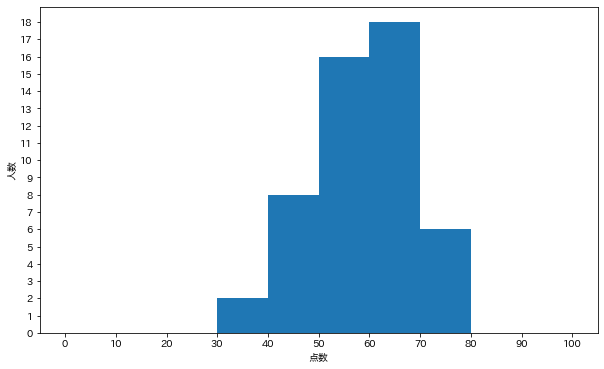

In [61]:
# キャンバスを作る
# figureで横、縦の大きさを指定
fig = plt.figure(figsize=(10, 6))
# キャンバス上に描画領域を作成
# 引数は領域を1×1個作り、1つめの領域に描画する事を意味する
ax = fig.add_subplot(111)

# 階級数を１０にしてヒストグラムを描画
freq, _, _ = ax.hist(english_scores, bins=10, range=(0, 100))

# x軸にラベルをつける
ax.set_xlabel('点数')
# y軸にラベルをつける
ax.set_ylabel('人数')
# x軸に0, 10, ..... , 100の目盛りをふる
ax.set_xticks(np.linspace(0, 100, 10+1))
# y軸に0, 1, 2, ....の目盛りをふる
ax.set_yticks(np.arange(0, freq.max()+1))
# グラフの表示
plt.show()

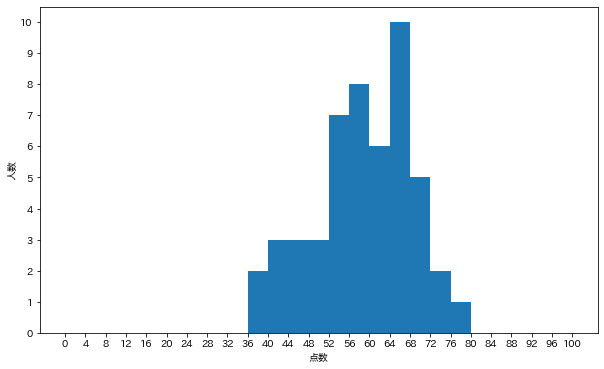

In [62]:
# 階級数を10→２5に増やしてヒストグラムを描画する
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

freq, _, _ = ax.hist(english_scores, bins=25, range=(0, 100))
# x軸にラベルをつける
ax.set_xlabel('点数')
# y軸にラベルをつける
ax.set_ylabel('人数')
# x軸に0, 10, ..... , 100の目盛りをふる
ax.set_xticks(np.linspace(0, 100, 25+1))
# y軸に0, 1, 2, ....の目盛りをふる
ax.set_yticks(np.arange(0, freq.max()+1))
# グラフの表示
plt.show()

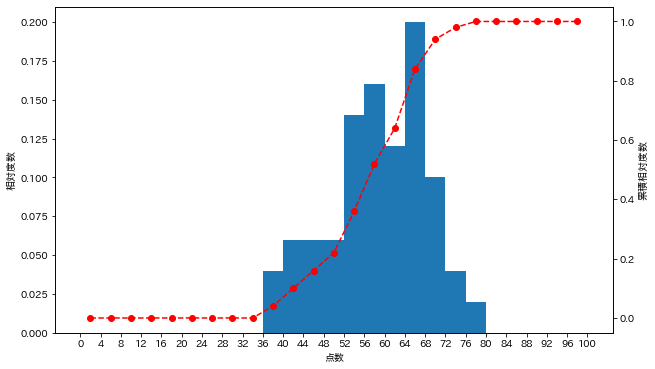

In [69]:
# 相対度数のヒストグラムを累積相対度数の折れ線グラフと一緒に描画する
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)

# y軸のスケールが違うグラフをax1と同じ領域上に書けるようにする
ax2 = ax1.twinx()

# 相対度数のヒストグラムにするには、度数をデータの数で割る必要がある
# これはhistの引数weightを指定する事で実現できる
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25, range=(0, 100), weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]

# 折れ線グラフの描画
# 引数lsを'--'にする事で線が点線に
# 引数markerを'o'にする事でデータ点を丸に
# 引数colorを'gray'にする事で灰色に
ax2.plot(class_value, cum_rel_freq, ls='--', marker='o', color='red')

# 折れ線グラフの罫線を消去
ax2.grid(visible=False)

ax1.set_xlabel('点数')
ax1.set_ylabel('相対度数')
ax2.set_ylabel('累積相対度数')
ax1.set_xticks(np.linspace(0, 100, 25+1))

plt.show()

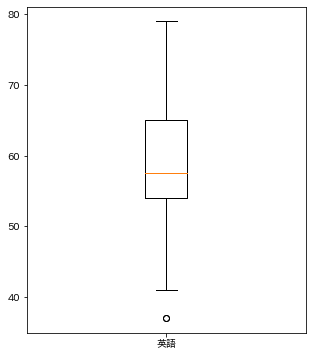

In [71]:
# 箱ひげ図を描画
# →データのばらつきを表現する図
#     箱はQ1〜Q3
#    ひげは四分位範囲のQ1-1.5IQR、Q3+1.5QRを表す(IOR = Q3-Q1)を表す
#    箱にもひげにも入り切らなかった値は外れ値とみなす

fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['英語'])

plt.show()